# Neural Networks

## Data set for digit number recognition 

The data set is made of 8x8 images of digits. We start with loading the dataset.

In [1]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
from sklearn import tree

# The digits dataset
digits = datasets.load_digits()

Now, let's have a look at some of the first images, stored in the images attribute of the dataset.
-  If we were working from image files, we could load them using matplotlib.pyplot.imread. Note that each image must have the same size. 
-  For these images, we know which digit they represent: it is given in the 'target' of the dataset.


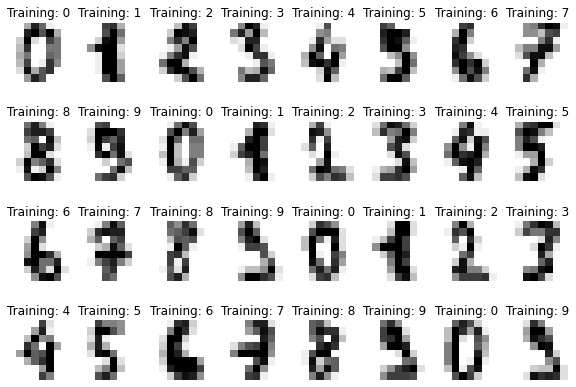

In [2]:
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(10,7))
for index, (image, label) in enumerate(images_and_labels[:32]):
    plt.subplot(4, 8, index + 1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r)
    plt.title('Training: %i' % label)
plt.show()

In [3]:
len(images_and_labels)

1797

We need to do some preprocessing!

In [4]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))



Next, let's see what our classification algorithms does:

In [5]:
# Create a classifier: 

classifier = MLPClassifier(hidden_layer_sizes=(100,))

# We learn the digits on the first half of the digits
classifier.fit(data, digits.target)

# Now predict the value of the digit on the second half:
expected = digits.target
predicted = classifier.predict(data)



Lets show the predictions:

In [6]:
classifier

MLPClassifier()

In [7]:
n_samples,predicted.size

(1797, 1797)

In [8]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassified_indicies = []
for label, predict in zip(expected, predicted):
 if label != predict: 
  misclassified_indicies.append(index)
  index +=1
number_of_missclassified_data =len(misclassified_indicies)
print('indicies of missclssified data', misclassified_indicies)
print('number of missclassified pictures :',number_of_missclassified_data )

indicies of missclssified data []
number of missclassified pictures : 0


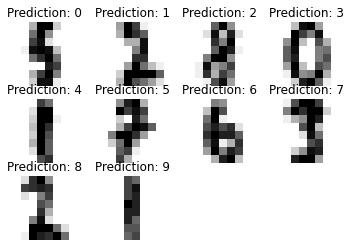

In [9]:
images_and_predictions = list(zip(digits.images[9*(n_samples) // 10:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(3, 4, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Prediction: %i' % prediction)

plt.show()

Evaluation metrics can be used to compare your classifications:

In [10]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))


Classification report for classifier MLPClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       182
           2       1.00      1.00      1.00       177
           3       1.00      1.00      1.00       183
           4       1.00      1.00      1.00       181
           5       1.00      1.00      1.00       182
           6       1.00      1.00      1.00       181
           7       1.00      1.00      1.00       179
           8       1.00      1.00      1.00       174
           9       1.00      1.00      1.00       180

    accuracy                           1.00      1797
   macro avg       1.00      1.00      1.00      1797
weighted avg       1.00      1.00      1.00      1797


Confusion matrix:
[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0  

## Splitting into Training and Testing Data

## Importing Digits data set from SKLearn

In [11]:
from sklearn.datasets import load_digits

new_digit = load_digits()
type(new_digit)


sklearn.utils.Bunch

In [12]:
# View Digits data
new_digit.data.shape

(1797, 64)

**Data Contains 1797 pictures of size 8x8 i.e 64**

## Setting Descriptive and Target features ( data = descriptive , target = target in this data set)

In [13]:
descriptive_features = new_digit.data
target_feature = new_digit.target

descriptive_features.shape, target_feature.shape

((1797, 64), (1797,))

## Splitting data

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(descriptive_features, target_feature, test_size=1/5, random_state=0)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((1437, 64), (360, 64), (1437,), (360,))

## Training Model -  Neural Network

### 10 Hidden Layers

In [16]:
# Create a classifier: 

classifier_10 = MLPClassifier(hidden_layer_sizes=(10,))

# We learn the digits on the first half of the digits
classifier_10.fit(x_train, y_train)




C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,))

## Predicting test data

In [17]:
# Predicting the Test set results
y_pred = classifier_10.predict(x_test)


## Accuracy test

In [18]:
score_10 = classifier_10.score(x_test,y_test)
print('acuracy of model is :' , score_10)

acuracy of model is : 0.9222222222222223


## Training Model -  Neural Network - Hiidden Layers = 100

In [19]:
# Create a classifier: 

classifier_100 = MLPClassifier(hidden_layer_sizes=(100,))

# We learn the digits on the first half of the digits
classifier_100.fit(x_train, y_train)




MLPClassifier()

## Predicting test data

In [20]:
# Predicting the Test set results
y_pred = classifier_100.predict(x_test)


## Accuracy test

In [21]:
score_100 = classifier.score(x_test,y_test)
print('acuracy of model is :' , score_100)

acuracy of model is : 1.0


## Training Model -  Neural Network - Hiidden Layers = 1000

In [22]:
# Create a classifier: 

classifier_1000 = MLPClassifier(hidden_layer_sizes=(1000,))

# We learn the digits on the first half of the digits
classifier_1000.fit(x_train, y_train)




MLPClassifier(hidden_layer_sizes=(1000,))

## Predicting test data

In [23]:
# Predicting the Test set results
y_pred = classifier_1000.predict(x_test)


## Accuracy test

In [24]:
score_1000 = classifier_1000.score(x_test,y_test)
print('acuracy of model is :' , score_1000)

acuracy of model is : 0.9833333333333333


## Training Model -  Neural Network - Hiidden Layers = 10000

In [25]:
# Create a classifier: 

classifier_10000 = MLPClassifier(hidden_layer_sizes=(10000,))

# We learn the digits on the first half of the digits
classifier_10000.fit(x_train, y_train)




MLPClassifier(hidden_layer_sizes=(10000,))

## Predicting test data

In [26]:
# Predicting the Test set results
y_pred = classifier_10000.predict(x_test)


## Accuracy test

In [27]:
score_10000 = classifier_10000.score(x_test,y_test)
print('acuracy of model is :' , score_10000)

acuracy of model is : 0.9833333333333333


## Training Model -  Neural Network - Hiidden Layers = 100000

In [28]:
# Create a classifier: 

classifier_100000 = MLPClassifier(hidden_layer_sizes=(100000,))

# We learn the digits on the first half of the digits
classifier_100000.fit(x_train, y_train)




## Predicting test data

In [ ]:
# Predicting the Test set results
y_pred = classifier_100000.predict(x_test)


## Accuracy test

In [ ]:
score_100000 = classifier_100000.score(x_test,y_test)
print('acuracy of model is :' , score_100000)

In [ ]:
x =[10,100,1000,10000,100000]
y =[score_10,score_100,score_1000,score_10000,score_100000]

In [ ]:
import seaborn as sns
plt.figure(figsize=(14,6))
a =sns.lineplot(x=x, y=y, ci=None)
a.set(xlabel='Number of Hidden Layers', ylabel='Accuracy')
plt.show()

## Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

## Creating HEATMAP to understand Confusion matrix

In [ ]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot = True,)
plt.ylabel = 'Actual Output'
plt.xlabel = 'Predicted Output'
cm_title = 'Accuracy score : {0}'.format(score_1000)
plt.title(cm_title)

## Getting Misclassified Labels

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
 if label != predict: 
  misclassifiedIndexes.append(index)
  index +=1

In [ ]:
index = 0
misclassified_indicies = []
for label, predict in zip(y_test,y_pred):
    if label != predict:
        #print(index,label,predict) #Debugging
        misclassified_indicies.append(index)
    index = index +1
number_of_missclassified_data =len(misclassified_indicies)
print('indicies of missclssified data', misclassified_indicies)
print('number of missclassified pictures :',number_of_missclassified_data )

## Plotting Missclassified Lables with Real Lables

In [ ]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(20,4))
for plotindex, badindex in enumerate(misclassified_indicies):
    plt.subplot(1,number_of_missclassified_data, plotindex+1)
    plt.imshow(np.reshape(x_test[badindex],(8,8)), cmap=plt.cm.gray)
    plt.title('x:{}, y:{}'.format(y_test[badindex],y_pred[badindex]), fontsize =20)# predicted =y ; actual =x

    